In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
import os

In [4]:
df=pd.read_csv("/content/youtubers_df.csv")
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


Data cleaning And exploration

In [5]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [7]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [8]:
df.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [9]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [10]:
df.describe (include='all')

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
count,1000.000000,1000,694,1.000000e+03,1000,1.000000e+03,1.000000e+03,1000.000000,1000
unique,NaN,994,45,NaN,29,NaN,NaN,NaN,994
top,NaN,NickyJamTV,Música y baile,NaN,Estados Unidos,NaN,NaN,NaN,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
freq,NaN,2,160,NaN,293,NaN,NaN,NaN,2
mean,500.500000,NaN,NaN,2.189440e+07,NaN,1.209446e+06,5.363259e+04,1288.768000,NaN
std,288.819436,NaN,NaN,1.682775e+07,NaN,5.229942e+06,2.580457e+05,6778.188308,NaN
min,1.000000,NaN,NaN,1.170000e+07,NaN,0.000000e+00,0.000000e+00,0.000000,NaN
25%,250.750000,NaN,NaN,1.380000e+07,NaN,3.197500e+04,4.717500e+02,2.000000,NaN
50%,500.500000,NaN,NaN,1.675000e+07,NaN,1.744500e+05,3.500000e+03,67.000000,NaN
75%,750.250000,NaN,NaN,2.370000e+07,NaN,8.654750e+05,2.865000e+04,472.000000,NaN


In [11]:
df.rename(columns = {'Suscribers' : 'Subscribers'}, inplace=True)


In [12]:
df.dtypes

Rank             int64
Username        object
Categories      object
Subscribers    float64
Country         object
Visits         float64
Likes          float64
Comments       float64
Links           object
dtype: object

In [13]:
#check for null values
df.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [14]:
#drop null values
df.dropna(inplace=True)

In [15]:
df['Categories'].fillna('unknown', inplace=True)

In [16]:
df.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
989    False
990    False
991    False
997    False
999    False
Length: 694, dtype: bool

Checking Outliers


In [17]:
#Checking outliers in the subscribers
df['Subscribers'].describe()

count    6.940000e+02
mean     2.241556e+07
std      1.824123e+07
min      1.170000e+07
25%      1.380000e+07
50%      1.680000e+07
75%      2.390000e+07
max      2.495000e+08
Name: Subscribers, dtype: float64

Calculating z_scores in the dataframe based on different parameters

In [18]:
df['z_scores'] = (df['Subscribers'] - df['Subscribers'].mean())/df['Subscribers'].std()
df

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,z_scores
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,12.448966
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,8.830789
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,7.844013
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,4.993328
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,4.883686
...,...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...,-0.587436
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...,-0.587436
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...,-0.587436
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,-0.587436


In [19]:
df['z_likes'] = (df['Likes'] - df['Likes'].mean()) / df['Likes'].std()
df

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,z_scores,z_likes
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,12.448966,-0.170398
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,8.830789,17.607504
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,7.844013,-0.096565
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,4.993328,-0.137844
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,4.883686,0.482686
...,...,...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...,-0.587436,-0.149926
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...,-0.587436,0.151110
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...,-0.587436,-0.146234
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,-0.587436,-0.176959


In [20]:
df['Comments'].describe()                      # checking outliers from comments

count       694.000000
mean       1558.793948
std        7967.470234
min           0.000000
25%           2.000000
50%          78.000000
75%         499.750000
max      154000.000000
Name: Comments, dtype: float64

In [21]:
df['z_comments'] = (df.Comments - df.Comments.mean()) / df.Comments.std()
df


,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,z_scores,z_likes,z_comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,12.448966,-0.170398,-0.185855
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,8.830789,17.607504,2.126297
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,7.844013,-0.096565,-0.195645
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,4.993328,-0.137844,-0.195645
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,4.883686,0.482686,0.419356
...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...,-0.587436,-0.149926,-0.152720
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...,-0.587436,0.151110,0.168335
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...,-0.587436,-0.146234,-0.125861
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,-0.587436,-0.176959,-0.195645


In [22]:
df['Visits'].describe()                    #checking outlier based on visits


count    6.940000e+02
mean     1.210730e+06
std      6.038274e+06
min      0.000000e+00
25%      3.692500e+04
50%      1.587000e+05
75%      8.339000e+05
max      1.174000e+08
Name: Visits, dtype: float64

In [23]:
df['z_visits'] = (df.Visits - df.Visits.mean())/df.Visits.std()
df


,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,z_scores,z_likes,z_comments,z_visits
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,12.448966,-0.170398,-0.185855,-0.186234
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,8.830789,17.607504,2.126297,19.242133
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,7.844013,-0.096565,-0.195645,0.958762
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,4.993328,-0.137844,-0.195645,0.445371
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,4.883686,0.482686,0.419356,0.196955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...,-0.587436,-0.149926,-0.152720,-0.141055
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...,-0.587436,0.151110,0.168335,0.114150
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...,-0.587436,-0.146234,-0.125861,-0.121381
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,-0.587436,-0.176959,-0.195645,-0.165499


Removing Outiliers from the dataframe


In [24]:
df.rename(columns = {'z_scores' : 'z_subscribers'}, inplace = True)

In [25]:
df[(df.z_subscribers > 3) | (df.z_subscribers < -3)]  #Outliers Based On Subscribers


,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,z_subscribers,z_likes,z_comments,z_visits
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,12.448966,-0.170398,-0.185855,-0.186234
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,8.830789,17.607504,2.126297,19.242133
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,7.844013,-0.096565,-0.195645,0.958762
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,4.993328,-0.137844,-0.195645,0.445371
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,4.883686,0.482686,0.419356,0.196955
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...,4.664403,-0.085490,-0.195645,0.230077
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...,4.329995,-0.105291,-0.195645,0.478493
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...,4.236800,-0.170733,-0.191628,-0.188204
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...,4.099748,-0.158316,-0.168786,-0.169954
10,11,BLACKPINK,Música y baile,91300000.0,Estados Unidos,863200.0,146900.0,3400.0,http://youtube.com/channel/UCOmHUn--16B90oW2L6...,3.776305,0.313542,0.231090,-0.057554


In [26]:
new_df = df[(df.z_subscribers < 3) & (df.z_subscribers > -3)]
new_df

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,z_subscribers,z_likes,z_comments,z_visits
14,15,BTS,Música y baile,76500000.0,India,969700.0,180300.0,7400.0,http://youtube.com/channel/UCLkAepWjdylmXSltof...,2.964956,0.425633,0.733132,-0.039917
15,16,HYBELABELS,Música y baile,72700000.0,Estados Unidos,440700.0,23900.0,932.0,http://youtube.com/channel/UC3IZKseVpdzPSBaWxB...,2.756636,-0.099250,-0.078669,-0.127525
17,18,Pinkfong,"Animación, Juguetes",69600000.0,Unknown,506400.0,397.0,0.0,http://youtube.com/channel/UCcdwLMPsaU2ezNSJU1...,2.586692,-0.178127,-0.195645,-0.116644
18,19,ChuChuTV,Juguetes,67500000.0,Unknown,652100.0,17800.0,0.0,http://youtube.com/channel/UCBnZ16ahKA2DZ_T5W0...,2.471568,-0.119722,-0.195645,-0.092515
19,20,KondZilla,Música y baile,66600000.0,Brasil,30400.0,1100.0,4.0,http://youtube.com/channel/UCffDXn7ycAzwL2LDlb...,2.422229,-0.175767,-0.195143,-0.195475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...,-0.587436,-0.149926,-0.152720,-0.141055
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...,-0.587436,0.151110,0.168335,0.114150
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...,-0.587436,-0.146234,-0.125861,-0.121381
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,-0.587436,-0.176959,-0.195645,-0.165499


In [27]:
df = new_df # DataFrame without outliers based on subscribers
df.shape

(682, 13)

In [28]:
df[(df.z_likes > 3) | (df.z_likes < -3)] #Outliers based on likes

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,z_subscribers,z_likes,z_comments,z_visits
136,137,MrBeast2,Vlogs diarios,31300000.0,Estados Unidos,83100000.0,5000000.0,11600.0,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...,0.487053,16.600695,1.260275,13.561702
153,154,DaFuqBoom,"Animación, Humor",29800000.0,Estados Unidos,52700000.0,1700000.0,82800.0,http://youtube.com/channel/UCsSsgPaZ2GSmO6il8C...,0.404821,5.525793,10.196612,8.527150
341,342,triggeredinsaan,Humor,20400000.0,India,11100000.0,1400000.0,38000.0,http://youtube.com/channel/UCfLuT3JwLx8rvHjHfT...,-0.110495,4.518984,4.573749,1.637764
488,489,BeastPhilanthropy,Comida y bebida,16900000.0,Estados Unidos,21500000.0,952100.0,24000.0,http://youtube.com/channel/UCAiLfjNXkNv24uhpzU...,-0.302368,3.015818,2.816604,3.360111


In [29]:
new_df = df[(df.z_likes < 3) & (df.z_likes > -3)]
new_df

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,z_subscribers,z_likes,z_comments,z_visits
14,15,BTS,Música y baile,76500000.0,India,969700.0,180300.0,7400.0,http://youtube.com/channel/UCLkAepWjdylmXSltof...,2.964956,0.425633,0.733132,-0.039917
15,16,HYBELABELS,Música y baile,72700000.0,Estados Unidos,440700.0,23900.0,932.0,http://youtube.com/channel/UC3IZKseVpdzPSBaWxB...,2.756636,-0.099250,-0.078669,-0.127525
17,18,Pinkfong,"Animación, Juguetes",69600000.0,Unknown,506400.0,397.0,0.0,http://youtube.com/channel/UCcdwLMPsaU2ezNSJU1...,2.586692,-0.178127,-0.195645,-0.116644
18,19,ChuChuTV,Juguetes,67500000.0,Unknown,652100.0,17800.0,0.0,http://youtube.com/channel/UCBnZ16ahKA2DZ_T5W0...,2.471568,-0.119722,-0.195645,-0.092515
19,20,KondZilla,Música y baile,66600000.0,Brasil,30400.0,1100.0,4.0,http://youtube.com/channel/UCffDXn7ycAzwL2LDlb...,2.422229,-0.175767,-0.195143,-0.195475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...,-0.587436,-0.149926,-0.152720,-0.141055
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...,-0.587436,0.151110,0.168335,0.114150
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...,-0.587436,-0.146234,-0.125861,-0.121381
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,-0.587436,-0.176959,-0.195645,-0.165499


In [30]:
df = new_df #DataFrame without outliers based on likes
df.shape


(678, 13)

Trend Analysis

In [31]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=60ceb4d1afc3b6e32c9ce2a8bfe67b534164a468d09c6146ad1808227e50ce6d
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [32]:
from googletrans import Translator
t=Translator()


In [33]:
most_pop = pd.DataFrame(df['Categories'].value_counts())
pop_df = most_pop.reset_index()
pop_df.columns = ['Categories', 'Count']
pop_df


,Categories,Count
0,Música y baile,157
1,"Películas, Animación",60
2,"Música y baile, Películas",41
3,Noticias y Política,36
4,Vlogs diarios,36
5,"Películas, Humor",34
6,"Animación, Videojuegos",34
7,"Animación, Juguetes",27
8,"Animación, Humor",26
9,Películas,23


In [34]:
temp = []
for i in pop_df['Categories']:
 a = t.translate(i, dest = "en", src = "es")
 temp.append(a.text)

In [35]:
pop_df['Categories'] = temp
pop_df.head(11)


,Categories,Count
0,Music and dance,157
1,"Movies, animation",60
2,"Music and dance, movies",41
3,News and politics,36
4,Vlogs daily,36
5,"Movies, humor",34
6,"Animation, video games",34
7,"Animation, toys",27
8,"Animation, humor",26
9,Films,23


In [36]:
import plotly.express as px

In [37]:

fig = px.bar(data_frame = pop_df.head(11), x = 'Categories', y = 'Count', color_discrete_sequence = ['#ffb346'])
fig.update_layout(
title = 'Most Popular Categories',
title_x = .5,
title_font = dict(color = 'red', size = 20, family = 'Cambria'))
fig.show()


In [38]:
#Top 10 Subscribed categories

In [39]:
top_sub=df.groupby('Categories')['Subscribers'].sum().sort_values(ascending=False).reset_index()
top_sub.head(10)

,Categories,Subscribers
0,Música y baile,3.853400e+09
1,"Películas, Animación",1.298900e+09
2,"Música y baile, Películas",7.985000e+08
3,Noticias y Política,6.761000e+08
4,"Animación, Videojuegos",6.594000e+08
5,"Animación, Juguetes",6.370000e+08
6,Vlogs diarios,6.236000e+08
7,"Películas, Humor",6.221000e+08
8,"Animación, Humor",5.314000e+08
9,Educación,4.348000e+08


Correlation between subscribers, likes and comments

In [40]:
correlation_likes = np.corrcoef(df['Subscribers'], df['Likes'])[0,1]
correlation_comments = np.corrcoef(df['Subscribers'], df['Comments'])[0,1]
correlation_likes, correlation_comments

(0.0650034786214137, 0.022802212386202877)

In [41]:
numeric_df = df[['Subscribers','Visits','Likes', 'Comments']]
correlation_matrix = numeric_df.corr()
correlation_matrix

,Subscribers,Visits,Likes,Comments
Subscribers,1.000000,0.058583,0.065003,0.022802
Visits,0.058583,1.000000,0.837807,0.361555
Likes,0.065003,0.837807,1.000000,0.451265
Comments,0.022802,0.361555,0.451265,1.000000


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


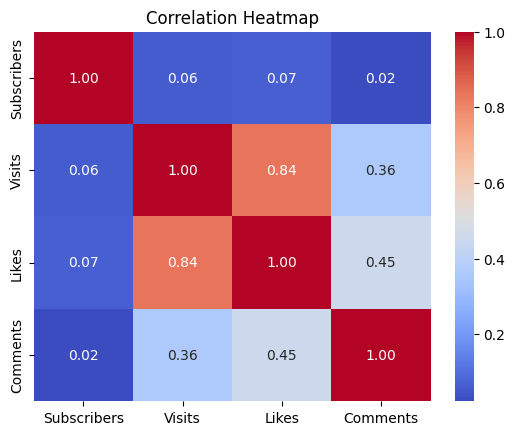

In [47]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Audience Study


In [48]:
country_distribution = df.groupby('Country')['Visits'].sum().sort_values(ascending = False).reset_index()
country_distribution


,Country,Visits
0,Estados Unidos,240521500.0
1,India,62483000.0
2,Unknown,47211700.0
3,Rusia,41699600.0
4,México,39065000.0
5,Brasil,18643600.0
6,Colombia,14156400.0
7,Argentina,11971400.0
8,Indonesia,11556900.0
9,Reino Unido,9250700.0


In [49]:
fig = px.bar(data_frame = country_distribution.head(10), x = 'Country', y = 'Visits', color_discrete_sequence = ['Pink'])
fig.update_layout(
title = 'Traffic From Different Countries',
title_x = .5,
title_font = dict(color = 'blue', size = 20, family = 'Cambria'))
fig.show()


In [50]:
content_category_distribution = df.groupby(['Country', 'Categories'])['Visits'].sum().unstack().fillna(0)
content_category_distribution

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,Películas,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos","Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Country,,,,,,,,,,,,,,,,,,,,,
Arabia Saudita,0.0,0.0,0.0,0.0,0.0,0.0,1200000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argelia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,5700000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76600.0,594800.0,5600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,89500.0,0.0,0.0,0.0,7400.0
Brasil,0.0,0.0,883900.0,533100.0,0.0,0.0,1865800.0,0.0,0.0,404100.0,...,2213400.0,3859900.0,1031500.0,0.0,20100.0,0.0,0.0,0.0,0.0,765300.0
Colombia,0.0,0.0,0.0,4508300.0,0.0,0.0,16900.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8619100.0
Egipto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
España,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,238400.0,0.0,0.0,145900.0,0.0,1600000.0,0.0,0.0,0.0
Estados Unidos,368500.0,557500.0,2388700.0,23002600.0,0.0,28200.0,27045700.0,4462900.0,964500.0,10796500.0,...,11565800.0,4492500.0,12489600.0,0.0,826800.0,0.0,11498500.0,42109700.0,0.0,3343400.0


In [51]:
content_category_distribution['Total'] = content_category_distribution.sum(axis = 1)
temp_df = content_category_distribution.sort_values('Total', ascending = False)
temp_df.drop('Total', inplace=True, axis=1)
temp_df = temp_df.head(10)
temp_df

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,Películas,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos","Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Country,,,,,,,,,,,,,,,,,,,,,
Estados Unidos,368500.0,557500.0,2388700.0,23002600.0,0.0,28200.0,27045700.0,4462900.0,964500.0,10796500.0,...,11565800.0,4492500.0,12489600.0,0.0,826800.0,0.0,11498500.0,42109700.0,0.0,3343400.0
India,0.0,0.0,0.0,0.0,0.0,0.0,839300.0,0.0,0.0,0.0,...,58500.0,7519900.0,3882400.0,0.0,1500000.0,0.0,0.0,264800.0,0.0,21498500.0
Unknown,0.0,0.0,2992100.0,179400.0,0.0,7209800.0,0.0,0.0,0.0,62800.0,...,410200.0,4420900.0,2342300.0,5638200.0,14100.0,0.0,0.0,0.0,422500.0,1935800.0
Rusia,0.0,0.0,17200.0,9700000.0,0.0,0.0,3991900.0,0.0,0.0,0.0,...,351000.0,789700.0,0.0,0.0,125600.0,0.0,12324200.0,5100000.0,1300000.0,0.0
México,0.0,0.0,1999500.0,10900000.0,0.0,0.0,2461500.0,0.0,0.0,1100000.0,...,990200.0,8561400.0,560000.0,0.0,519800.0,0.0,0.0,0.0,0.0,0.0
Brasil,0.0,0.0,883900.0,533100.0,0.0,0.0,1865800.0,0.0,0.0,404100.0,...,2213400.0,3859900.0,1031500.0,0.0,20100.0,0.0,0.0,0.0,0.0,765300.0
Colombia,0.0,0.0,0.0,4508300.0,0.0,0.0,16900.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8619100.0
Argentina,0.0,0.0,5700000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76600.0,594800.0,5600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Indonesia,0.0,0.0,0.0,0.0,0.0,0.0,80900.0,0.0,0.0,56400.0,...,857500.0,3097200.0,397800.0,0.0,0.0,0.0,748400.0,0.0,0.0,131600.0


<ipython-input-60-44c9ae873420>:6: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



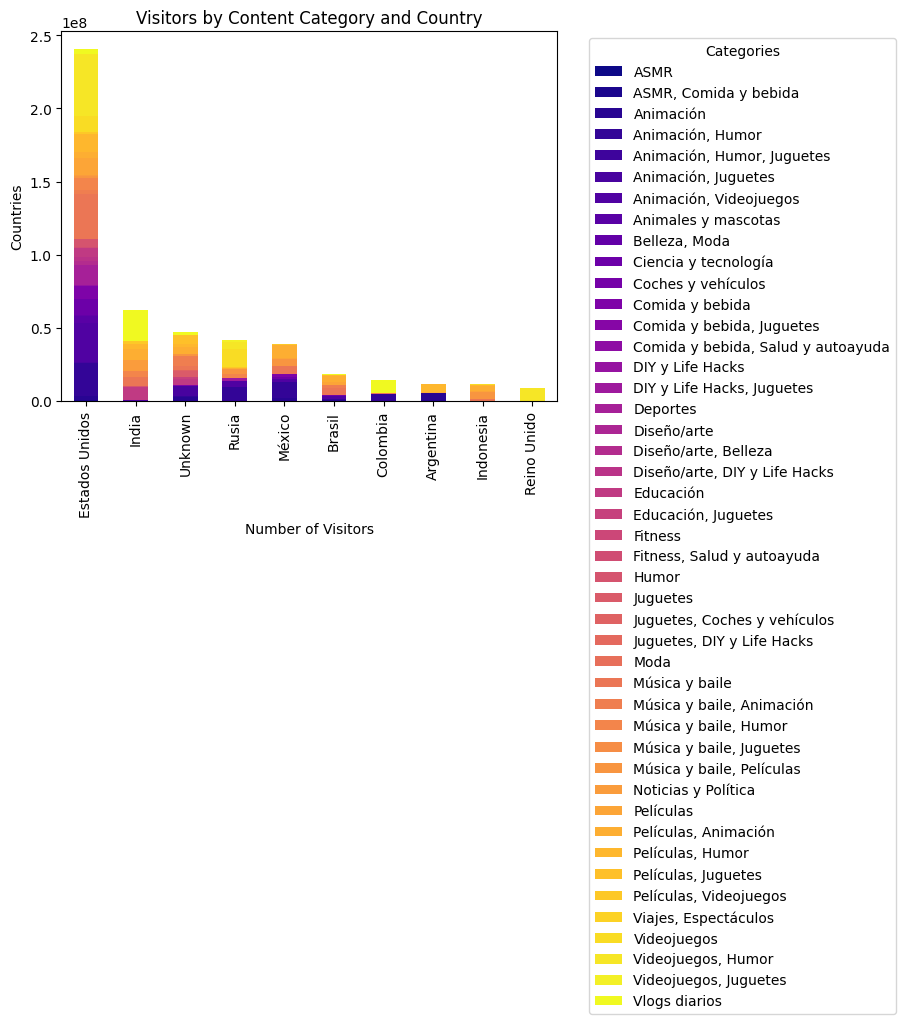

In [60]:
temp_df.plot(kind='bar', stacked=True, cmap='plasma')
plt.title('Visitors by Content Category and Country')
plt.xlabel('Number of Visitors')
plt.ylabel('Countries')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [53]:
df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

Subscribers    2.060723e+07
Visits         7.861919e+05
Likes          3.291189e+04
Comments       1.324813e+03
dtype: float64

<Axes: >

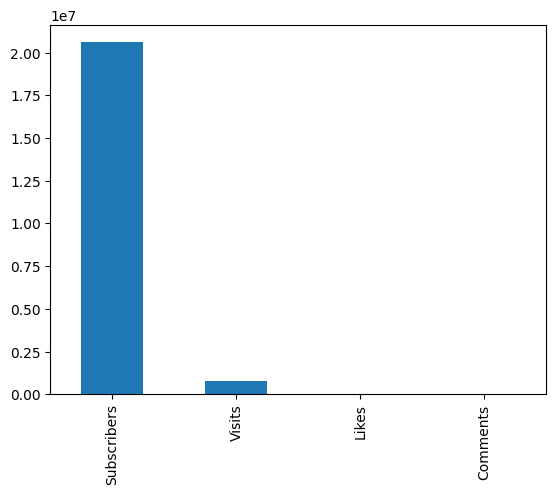

In [54]:
df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean().plot(kind = 'bar')

Top Categories by Number of Streamers:
Música y baile               157
Películas, Animación          60
Música y baile, Películas     41
Noticias y Política           36
Vlogs diarios                 36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           27
Animación, Humor              26
Películas                     23
Name: Categories, dtype: int64


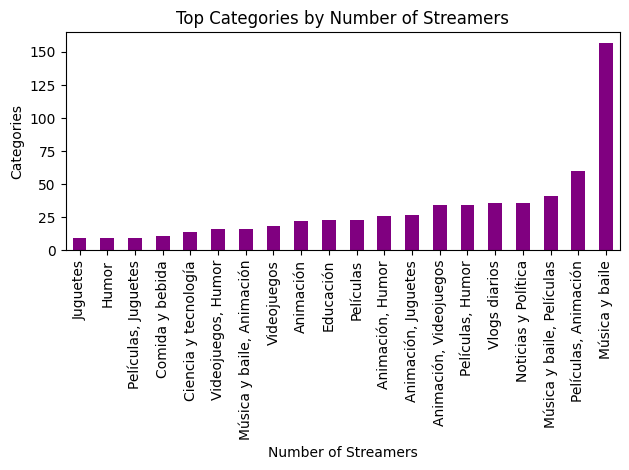

In [58]:
category_counts = df['Categories'].value_counts()
# Display top categories by the number of streamers
print("Top Categories by Number of Streamers:")
print(category_counts.head(10))
category_counts.head(20).sort_values().plot(kind='bar', color='purple')
plt.title('Top Categories by Number of Streamers')
plt.xlabel('Number of Streamers')
plt.ylabel('Categories')
plt.tight_layout()
plt.show()

Benchmarking

In [59]:
df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()

Subscribers    2.060723e+07
Visits         7.861919e+05
Likes          3.291189e+04
Comments       1.324813e+03
dtype: float64

In [68]:
top_youtubers = above_average_streamers[['Username', 'Categories', 'Subscribers', 'Visits', 'Likes', 'Comments']]
top_youtubers

,Username,Categories,Subscribers,Visits,Likes,Comments
14,BTS,Música y baile,76500000.0,969700.0,180300.0,7400.0
26,dudeperfect,Videojuegos,59700000.0,5300000.0,156500.0,4200.0
34,TaylorSwift,Música y baile,54100000.0,4300000.0,300400.0,15000.0
37,ArianaGrande,Música y baile,52900000.0,1100000.0,85800.0,3800.0
39,JuegaGerman,"Películas, Animación",48600000.0,2000000.0,117100.0,3000.0
43,A4a4a4a4,"Animación, Humor",47300000.0,9700000.0,330400.0,22000.0
58,Mikecrack,"Películas, Animación",43400000.0,2200000.0,183400.0,1800.0
62,KimberlyLoaiza,Música y baile,42100000.0,5300000.0,271300.0,16000.0
70,JessNoLimit,"Películas, Animación",39600000.0,1300000.0,73500.0,1600.0
96,TotalGaming093,"Películas, Videojuegos",36300000.0,1500000.0,129400.0,4900.0


In [66]:
above_average_streamers = df[
 (df['Subscribers'] > df.Subscribers.mean())&
 (df['Visits'] > df.Visits.mean())&
 (df['Likes'] > df.Likes.mean())&
 (df['Comments'] > df.Comments.mean())]

In [69]:
print("Top performing streamers are : ")
top_youtubers.head(10)


Top performing streamers are : 


,Username,Categories,Subscribers,Visits,Likes,Comments
14,BTS,Música y baile,76500000.0,969700.0,180300.0,7400.0
26,dudeperfect,Videojuegos,59700000.0,5300000.0,156500.0,4200.0
34,TaylorSwift,Música y baile,54100000.0,4300000.0,300400.0,15000.0
37,ArianaGrande,Música y baile,52900000.0,1100000.0,85800.0,3800.0
39,JuegaGerman,"Películas, Animación",48600000.0,2000000.0,117100.0,3000.0
43,A4a4a4a4,"Animación, Humor",47300000.0,9700000.0,330400.0,22000.0
58,Mikecrack,"Películas, Animación",43400000.0,2200000.0,183400.0,1800.0
62,KimberlyLoaiza,Música y baile,42100000.0,5300000.0,271300.0,16000.0
70,JessNoLimit,"Películas, Animación",39600000.0,1300000.0,73500.0,1600.0
96,TotalGaming093,"Películas, Videojuegos",36300000.0,1500000.0,129400.0,4900.0


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


In [72]:
df['user_id'] = range(1, len(df['Username'])+1)

<ipython-input-72-e13517f80fae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



x = df[['Rank', 'Visits', 'Comments']]
y = df['user_id']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [76]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [77]:
y_pred = model.predict(x_test)
y_pred


array([367.6079743 ,  14.23779697, 232.62039443,  33.57927658,
       465.40579525, 590.07522367, 237.43123949, 314.58164401,
       521.24982981, 425.45543348,  28.06894408, 128.6202259 ,
        13.60423928,   7.40738544, 160.99239657,  12.2281241 ,
       397.17546644, 602.46019833, 472.2899371 , 558.3910901 ,
       362.08294431, 318.02127661,  58.41431629, 481.25538457,
       531.53316975, 624.51155755, 546.10814717, 437.8723866 ,
       180.96829129, 156.85623685, 201.62000373, 107.27327162,
        99.53577299, 455.08379459, 670.5985713 , 329.04407579,
       309.07345446, 443.29038771, 164.43928933, 115.19395901,
       158.93106487, 432.33762709, 646.55249596, 519.13587541,
       554.94732638, 122.42570429,  37.68403429, 337.30925661,
        82.50042444, 352.4177985 , 205.40663343, 616.2420721 ,
       209.89271564, 321.46919406,  90.67757374, 542.55213667,
       669.92254466, 125.86450983, 466.06369345, 667.9010711 ,
       623.81960375, 553.52842062, 163.75055713, 132.75

In [78]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")
print(f"R-Squared Error : {r2}")

Mean Absolute Error : 1.9453703886626972
Mean Squared Error : 5.705363953638332
R-Squared Error : 0.999864432216178


In [79]:
def recommended_streamers(categories, performance_threshold):
 recommended_streamers = df[(df['Categories'] == categories) & df['performanceMetrics'] > performance_threshold]
 recommended_streamers = recommended_streamers.sort_values(by = 'Subscribers', ascending = False)
 return recommended_streamers